This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The sklearn.datasets.fetch_olivetti_faces function is the data fetching / caching function that downloads the data archive from AT&T.

As described on the original website:

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pandas as pd
faces = fetch_olivetti_faces()

df = pd.DataFrame(data=faces.data)
df['person']=faces.target

df.head()


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,person
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [ ]:
features = faces.data
targets = faces.target

print(targets)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

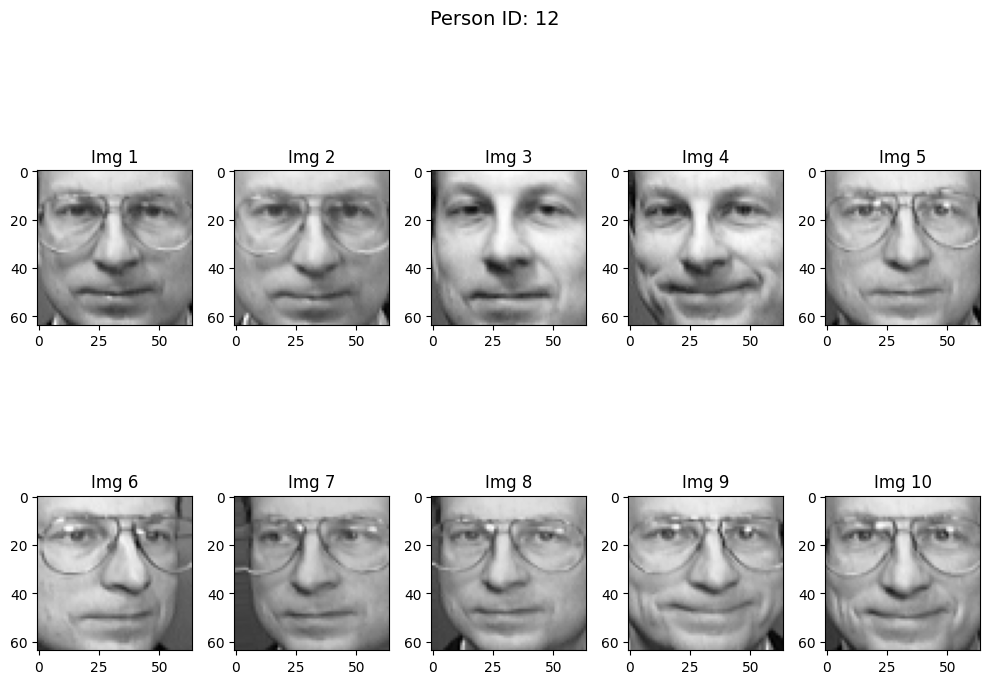

In [ ]:
person_id=12
start = person_id * 10
end = start + 10

plt.figure(figsize=(10,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(faces.images[start+i],cmap='grey')
  plt.title(f"Img {i+1}")
plt.suptitle(f"Person ID: {person_id}", fontsize=14)
plt.tight_layout()


# PCA Analysis


Text(0, 0.5, 'Explained Variance')

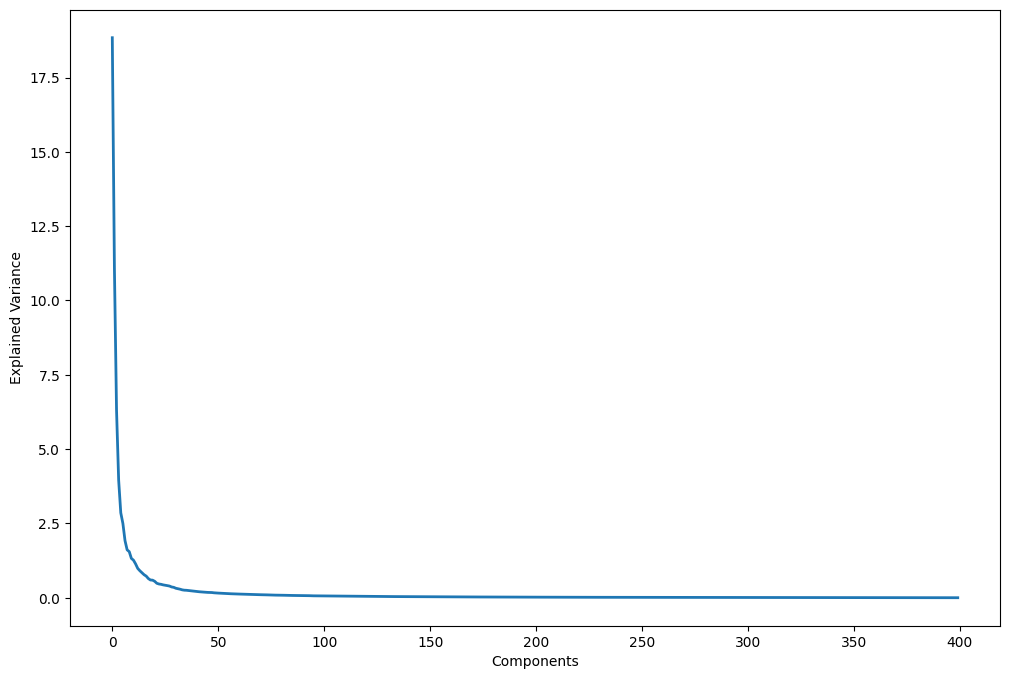

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

feature_train,feature_test,target_train,target_test = train_test_split(features,targets,test_size=0.25,stratify=targets, random_state=42)
pca = PCA()
pca.fit(features)

plt.figure(1,figsize=(12,8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variance')

In [ ]:
estimator = PCA(n_components=100,whiten=True)
feature_train_pca = estimator.fit_transform(feature_train)
feature_test_pca = estimator.transform(feature_test)

print(features.shape)
print(feature_train_pca.shape)

(400, 4096)
(300, 100)


In [ ]:
print(estimator.components_)

[[ 0.0013871   0.00444178  0.00633373 ...  0.00412855  0.00090176
   0.00126438]
 [ 0.02940465  0.03534574  0.04069127 ... -0.03045208 -0.02943759
  -0.02632847]
 [-0.00146403 -0.0056751  -0.00737526 ... -0.01453169 -0.01164445
  -0.00951603]
 ...
 [-0.00842736  0.00028561  0.0123344  ...  0.00378641  0.00904468
  -0.01564159]
 [-0.04679057 -0.0217967   0.00324379 ... -0.01298527  0.01751349
   0.00155648]
 [ 0.00955339 -0.00692617 -0.02175085 ... -0.0120116  -0.01398824
  -0.00689595]]


In [ ]:
number_of_eigenfaces = len(estimator.components_)
eigen_faces = estimator.components_.reshape((number_of_eigenfaces,64,64))


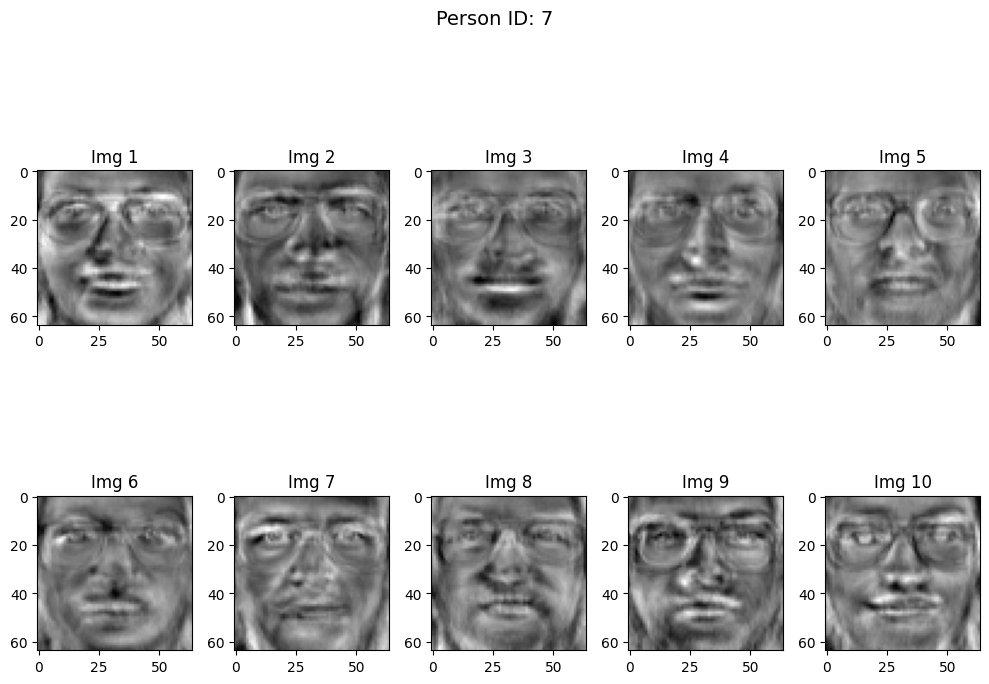

In [ ]:
person_id=7
start = person_id * 4
end = start + 4

plt.figure(figsize=(10,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(eigen_faces[start+i],cmap='grey')
  plt.title(f"Img {i+1}")
plt.suptitle(f"Person ID: {person_id}", fontsize=14)
plt.tight_layout()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

def evaluate_model(model,X_train,X_test,y_train,y_test, show_matrix=True):
  """
  Trains and evaluates a classifier model.

    Parameters:
        model: sklearn-like classifier (e.g., SVC(), KNeighborsClassifier(), etc.)
        X_train, X_test: Feature matrices
        y_train, y_test: Target arrays
        show_matrix: Whether to plot confusion matrix

    Returns:
        y_pred: Predicted labels on test set
        acc: Accuracy score

  """
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc= accuracy_score(y_test,y_pred)

  print(f"\n Accuracy: {acc:.4f}")

  # print("\n Classification Report:\n", classification_report(y_test,y_pred))

  # if show_matrix:
  #   # ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
  #   cm = confusion_matrix(y_test, y_pred)
  #   plt.figure(figsize=(10, 10))
  #   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
  #   plt.xlabel("Predicted")
  #   plt.ylabel("Actual")
  #   plt.title("Confusion Matrix")
  #   plt.tight_layout()

  return y_pred,acc


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", GaussianNB()),
    ("SVM (RBF)", SVC(kernel='rbf', gamma='scale')),
    ("KNN (k=3)", KNeighborsClassifier(n_neighbors=10)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100))
]


In [ ]:
for name, model in models:
    print(f"\n===  {name} ===")
    evaluate_model(model, feature_train_pca, feature_test_pca, target_train, target_test)



===  Logistic Regression ===

 Accuracy: 0.9800

===  Naive Bayes ===

 Accuracy: 0.9300

===  SVM (RBF) ===

 Accuracy: 0.9900

===  KNN (k=3) ===

 Accuracy: 0.6500

===  Decision Tree ===

 Accuracy: 0.4800

===  Random Forest ===

 Accuracy: 0.9400

===  AdaBoost ===

 Accuracy: 0.0900
